In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

import os
for dirname, _, filenames in os.walk(r'C:\Users\SRAVA\NYCTaxiFares.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('NYCTaxiFares.csv')
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [ ]:
data.describe()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,10.040326,0.333333,-73.976626,40.751443,-73.974501,40.751695,1.347167
std,7.500134,0.471406,0.031497,0.025821,0.032419,0.030279,0.759263
min,2.500000,0.000000,-74.465447,40.121653,-74.443323,40.164927,1.000000
25%,5.700000,0.000000,-73.992386,40.736594,-73.991478,40.735914,1.000000
50%,7.700000,0.000000,-73.982084,40.753661,-73.980411,40.754441,1.000000
75%,11.300000,1.000000,-73.968710,40.768020,-73.965500,40.768880,1.000000
max,49.900000,1.000000,-73.311845,40.981292,-73.496140,40.993498,5.000000


In [ ]:
data.isnull().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
data["fare_class"].value_counts()

0    80000
1    40000
Name: fare_class, dtype: int64

In [ ]:
print("Fare amount greater than 10$ :", data[data["fare_amount"]>=10].shape[0])
data[data["fare_amount"] >=10]

Fare amount greater than 10$ : 40000


,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1
12,2010-04-23 12:12:08 UTC,17.3,1,-73.997107,40.722116,-73.976628,40.775252,1
16,2010-04-15 21:54:26 UTC,14.1,1,-74.002233,40.734468,-73.961872,40.764459,2
20,2010-04-20 11:27:29 UTC,36.0,1,-73.874537,40.774075,-73.985187,40.760783,1
...,...,...,...,...,...,...,...,...
119989,2010-04-17 19:19:19 UTC,11.7,1,-74.001573,40.727515,-73.967402,40.763441,1
119991,2010-04-12 16:43:37 UTC,11.3,1,-73.975583,40.760748,-73.984528,40.742072,1
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1


In [ ]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [ ]:
data.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
from math import radians, cos,sin, asin,sqrt

def distance(lon1, lon2, lat1 , lat2):


    lon1 =radians(lon1)
    lon2 =radians(lon2)
    lat1 =radians(lat1)
    lat2 =radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))

    r = 6371
    return(round (c * r, 2))


d = []
for i in range(data.shape[0]):
    d.append(distance(data["pickup_latitude"][i],
                      data["dropoff_latitude"][i],
                      data["pickup_longitude"][i],
                      data["dropoff_longitude"][i]))

In [ ]:
data["distance in kms"] = d

In [ ]:
data.drop(["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"], axis=1, inplace=True)

In [ ]:
data.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,distance in kms
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46


In [ ]:
print("Date in data : ", data["pickup_datetime"].dt.day.sort_values().unique())
print("Month in data : ", data["pickup_datetime"].dt.month.unique()[0])
print("Year in data : ", data["pickup_datetime"].dt.year.unique()[0])

Date in data :  [11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
Month in data :  4
Year in data :  2010


In [ ]:
week_names = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

data["weekday_name"] = data["pickup_datetime"].dt.weekday.map(week_names)

In [ ]:
data.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,distance in kms,weekday_name
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93,Sunday
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77,Friday
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82,Friday
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16,Saturday
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46,Friday


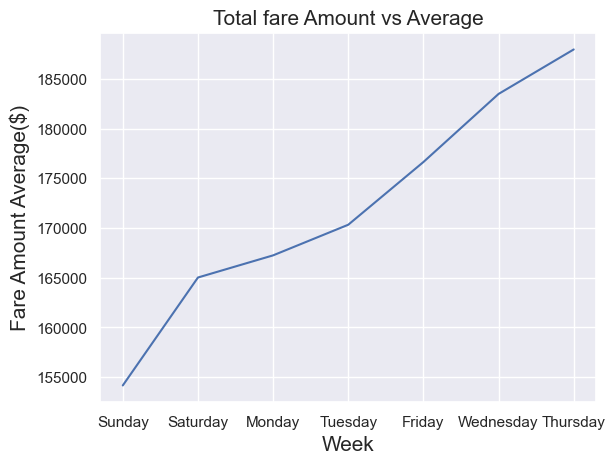

In [ ]:
data.groupby("weekday_name")["fare_amount"].sum().sort_values().plot()

plt.xlabel("Week", fontsize=15)
plt.ylabel("Fare Amount Average($)", fontsize=15)
plt.title("Total fare Amount vs Average", fontsize=15)
plt.show()

In [ ]:
week_names_encode = {"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}

In [ ]:
data["weekday_name"] = data["weekday_name"].map(week_names_encode)
data.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,distance in kms,weekday_name
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93,1
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77,5
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82,5
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16,2
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46,5


In [ ]:
data["Hour"] = data["pickup_datetime"].dt.hour

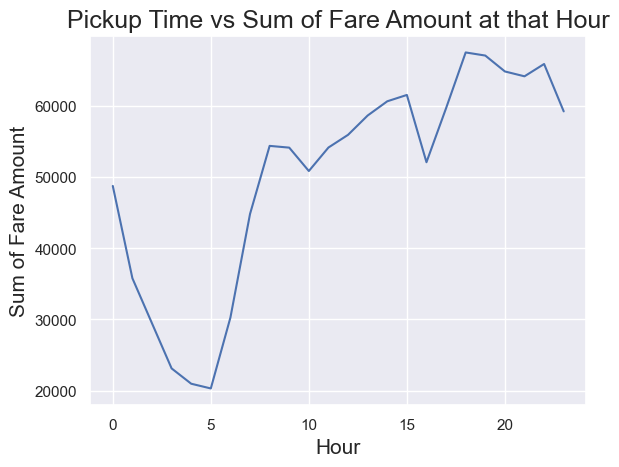

In [ ]:
data.groupby("Hour")["fare_amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that Hour", fontsize=18)
plt.xlabel("Hour", fontsize=15)
plt.ylabel("Sum of Fare Amount", fontsize=15)
plt.show()

In [ ]:
data["Month_Day"] = data["pickup_datetime"].dt.day

In [ ]:
for day in list(data["pickup_datetime"].dt.day.sort_values().unique()):
    print(f"Date : {day} \t Total fare Amount : ${round(data[data.pickup_datetime.dt.day==day].fare_amount.sum(), 2)}")

Date : 11 	 Total fare Amount : $64911.95
Date : 12 	 Total fare Amount : $77483.5
Date : 13 	 Total fare Amount : $84961.02
Date : 14 	 Total fare Amount : $85054.18
Date : 15 	 Total fare Amount : $91743.83
Date : 16 	 Total fare Amount : $94096.09
Date : 17 	 Total fare Amount : $87853.61
Date : 18 	 Total fare Amount : $82439.11
Date : 19 	 Total fare Amount : $76683.18
Date : 20 	 Total fare Amount : $82287.96
Date : 21 	 Total fare Amount : $85274.48
Date : 22 	 Total fare Amount : $91738.54
Date : 23 	 Total fare Amount : $93860.29
Date : 24 	 Total fare Amount : $88780.99
Date : 25 	 Total fare Amount : $17670.4


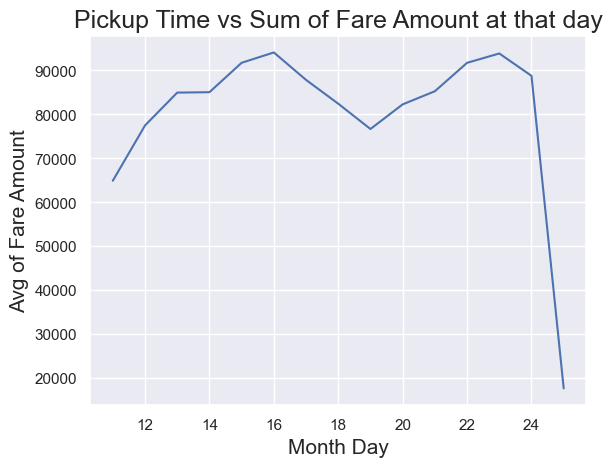

In [ ]:
data.groupby("Month_Day")["fare_amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that day", fontsize=18)
plt.xlabel("Month Day", fontsize=15)
plt.ylabel("Avg of Fare Amount", fontsize=15)
plt.show()


In [ ]:
data["passenger_count"].value_counts()

1    92531
2    18650
3     4874
4     2518
5     1427
Name: passenger_count, dtype: int64

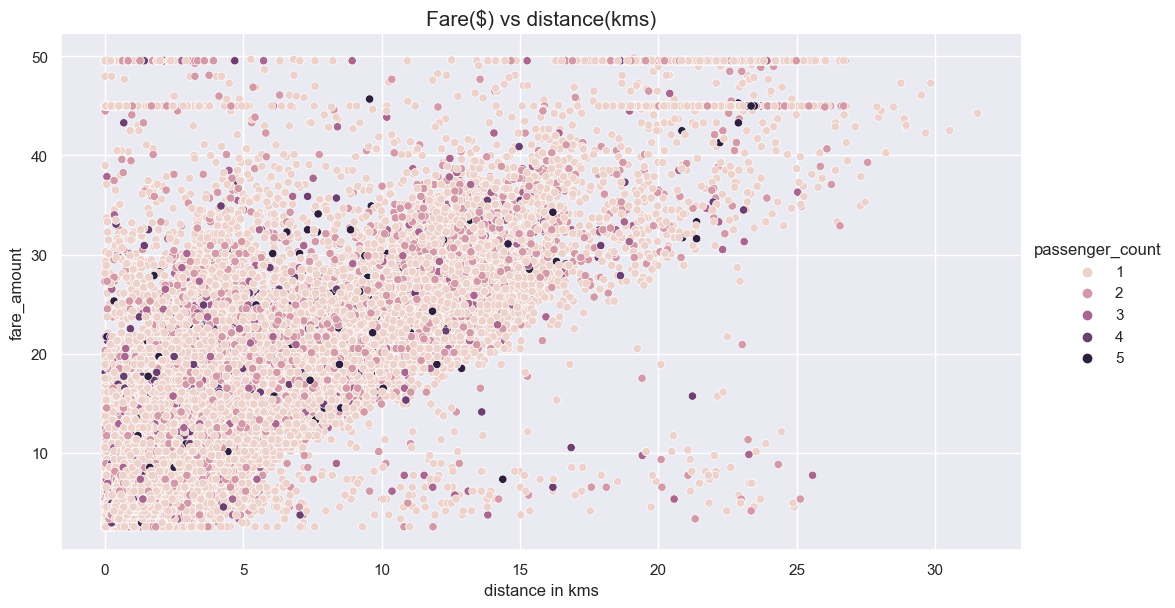

In [ ]:
sns.relplot(data = data, kind = "scatter",x = "distance in kms",y = "fare_amount",
            hue = "passenger_count",height=6 ,aspect = 1.75,)
plt.title("Fare($) vs distance(kms)" , fontsize=15)
plt.show()

In [ ]:
data["fare_class"].value_counts()

0    80000
1    40000
Name: fare_class, dtype: int64

In [ ]:
data["fare_class"].unique()

array([0, 1], dtype=int64)

In [ ]:
data.groupby(["fare_class","passenger_count"])[["passenger_count"]].sum()

passenger_count
fare_class passenger_count                 
0          1                          62591
           2                          23588
           3                           9426
           4                           6288
           5                           4505
1          1                          29940
           2                          13712
           3                           5196
           4                           3784
           5                           2630

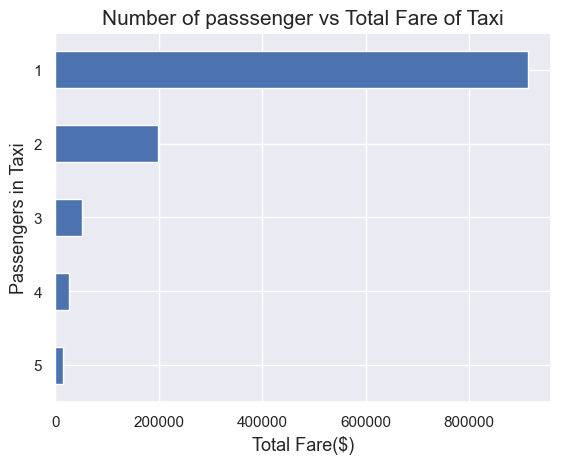

In [ ]:
data.groupby("passenger_count")["fare_amount"].sum().sort_values().plot.barh()
plt.xlabel("Total Fare($)",fontsize =13)
plt.ylabel("Passengers in Taxi", fontsize =13)
plt.title("Number of passsenger vs Total Fare of Taxi", fontsize = 15)
plt.show()

In [ ]:
data.drop("pickup_datetime", axis=1, inplace=True)

In [ ]:
data.to_csv("data_transformed.csv", index=False)

In [ ]:
df = pd.read_csv("data_transformed.csv")
df.head()

,fare_amount,fare_class,passenger_count,distance in kms,weekday_name,Hour,Month_Day
0,6.5,0,1,1.93,1,8,19
1,6.9,0,1,1.77,5,15,17
2,10.1,1,2,3.82,5,11,17
3,8.9,0,1,2.16,2,21,11
4,19.7,1,1,9.46,5,2,17


In [ ]:
X = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept= True)
linreg.fit(X_train , y_train)

LinearRegression()

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.8086959707381655

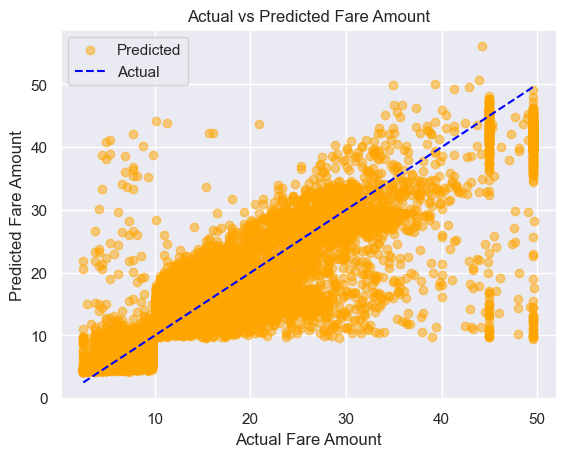

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='orange', label='Predicted', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Actual')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs Predicted Fare Amount')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators = 15)
rfreg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=15)

In [ ]:
predict = rfreg.predict(X_test)

In [ ]:
r2_score(y_test, predict)

0.8015689583967038

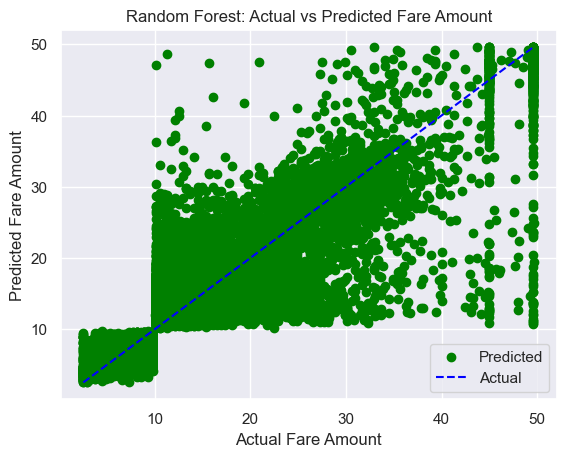

In [ ]:
plt.scatter(y_test, predict, color='green', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Actual')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Random Forest: Actual vs Predicted Fare Amount')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion='squared_error', max_depth=None, random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
pred = dt_reg.predict(X_test)
r2_score(y_test, pred)

0.6615339130052569

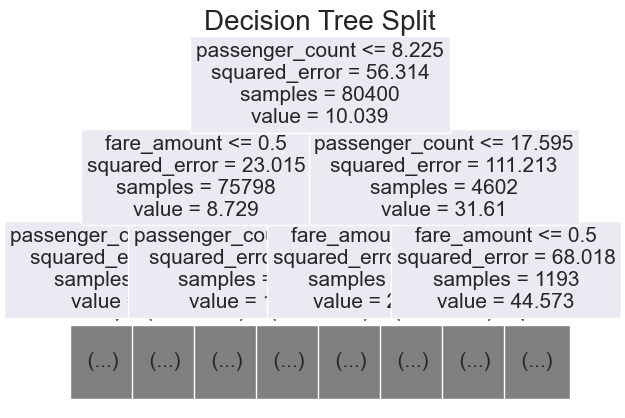

In [ ]:
from sklearn import tree
tree.plot_tree(dt_reg, max_depth = 2, fontsize = 15, feature_names=df.columns)
plt.title("Decision Tree Split", fontsize = 20)
plt.show()

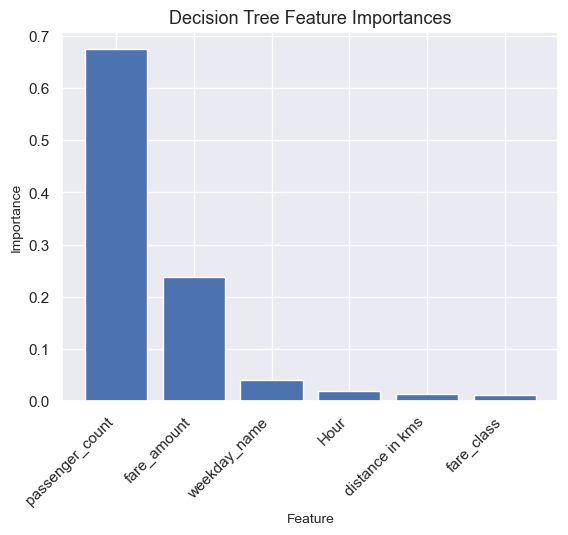

In [ ]:
feature_importances = dt_reg.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = df.columns[sorted_indices]
plt.bar(sorted_features, feature_importances[sorted_indices])
plt.title("Decision Tree Feature Importances", fontsize=13)
plt.xlabel("Feature", fontsize=10)
plt.ylabel("Importance", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
sample_input = {
    'fare_class': [0],          # Random fare class (0 or 1)
    'passenger_count': [2],     # Random passenger count
    'distance in kms': [5.0],   # Random distance in kilometers
    'weekday_name': [3],        # Random weekday (e.g., 0 for Monday, 1 for Tuesday, ..., 6 for Sunday)
    'Hour': [14],               # Random hour of the day
    'Month_Day': [25]           # Random day of the month
}

In [ ]:
sample_df = pd.DataFrame(sample_input)

In [ ]:
linreg_prediction = linreg.predict(sample_df)
print("Linear Regression Predicted Fare Amount:", linreg_prediction[0])

Linear Regression Predicted Fare Amount: 11.741720133956226


In [ ]:
rfreg_prediction = rfreg.predict(sample_df)
print("Random Forest Predicted Fare Amount:", rfreg_prediction[0])

Random Forest Predicted Fare Amount: 5.433333333333334


In [ ]:
dt_reg_prediction = dt_reg.predict(sample_df)
print("Decision Tree Predicted Fare Amount:", dt_reg_prediction[0])

Decision Tree Predicted Fare Amount: 9.3
